# Importing Libraries

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Importing Data

In [19]:
# import the dataset
raw_dataset = pd.read_csv('./data.csv')

# turning dataset into a pandas dataframe
dataframe = pd.DataFrame(raw_dataset)

# head(x) method returns the first 'x' rows of the dataframe
dataframe.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-14 0:00,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-14 0:00,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-14 0:00,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-14 0:00,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-14 0:00,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


# Data Processing

In [20]:
# dropping 'date', 'street', 'statezip', 'country' column
dataframe.drop(['date','street','statezip', 'country'], axis = 1, inplace = True)
dataframe.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


In [21]:
# "dtypes" property returns the data type of each column
dataframe.dtypes

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
city              object
dtype: object

## Feature Encoding

In [22]:
# Getting all the columns name where dtype == object
cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "object"]

# Feature Encoding the categorical colums
label_encoder = LabelEncoder()

# Turns categorical data into numerical data
for col in cat_cols:
    dataframe[col] = label_encoder.fit_transform(dataframe[col])
    
    
dataframe.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   int64  
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   int32  
dtypes: float64(3), int32(1), int64(10)
memory usage: 485.3 KB


In [23]:
dataframe.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31


## Visualizing Data

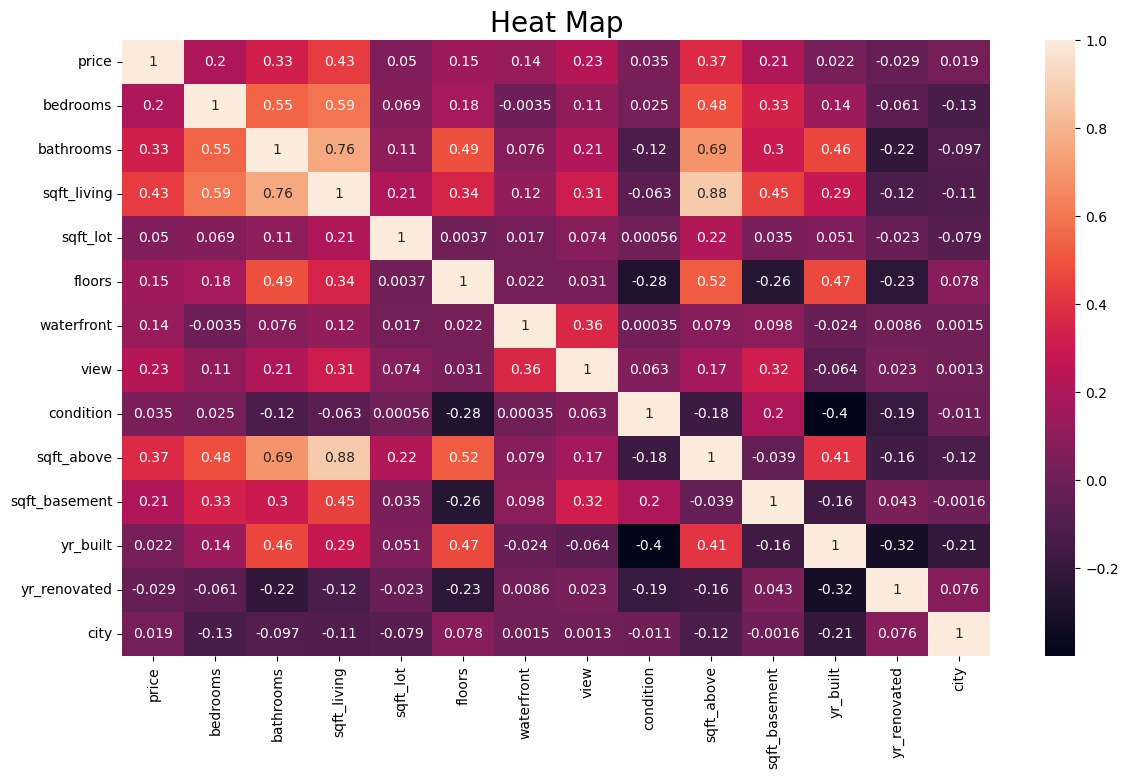

In [24]:
# draw Heat Map 
plt.figure(figsize=(14, 8))
sns.heatmap(dataframe.corr(), annot=True)
plt.title('Heat Map', size=20)
plt.yticks(rotation = 0)
plt.show()

## Formating dataset

In [25]:
# Calculate the price range
max_price = dataframe['price'].max() 
min_price = dataframe['price'].min()

print("Max price:", max_price)
print("Min price:", min_price)

Max price: 26590000.0
Min price: 0.0


In [26]:
# Calculate the average price excluding rows where price is 0
average_price = dataframe[dataframe['price'] != 0]['price'].mean()

# Replace 0 values with the calculated average price
dataframe['price'] = dataframe['price'].replace(0, average_price)

In [27]:
# checking bedrooms data distribution
dataframe['bedrooms'].value_counts()

3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
8       2
0       2
9       1
Name: bedrooms, dtype: int64

In [28]:
# getting the rows to remove
rows_to_remove = dataframe[(dataframe['bedrooms'] == 0) | (dataframe['bedrooms'] == 8)  | (dataframe['bedrooms'] == 9)].index

# total removed row
print(len(rows_to_remove))

# Remove rows with a price of 0 using the drop method
dataframe = dataframe.drop(rows_to_remove)

dataframe['bedrooms'].value_counts()

5


3    2032
4    1531
2     566
5     353
6      61
1      38
7      14
Name: bedrooms, dtype: int64

In [29]:
# Shuffling the dataset
dataframe = dataframe.sample(frac=1, random_state=42)

dataframe.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
3204,615000.0,3,1.75,1720,4080,1.0,0,0,4,960,760,1924,0,35
2823,210000.0,3,2.00,1440,7210,1.0,0,0,3,1440,0,1983,2009,1
1618,458000.0,5,2.50,3090,23265,1.0,0,0,3,2990,100,1957,2000,5
2699,1538000.0,3,2.25,2880,7599,1.0,0,2,3,1710,1170,1958,2002,19
3492,219500.0,3,1.00,1090,6710,1.5,0,0,5,1090,0,1912,0,1


In [30]:
# X = feature 
X = dataframe.drop("price", axis=1)    # everything except 'price' column

# y = Target 
y = dataframe['price']    # only 'price' column

## Splitting Dataset

In [31]:
# splitting dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model

In [32]:
# Create a Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Predicting house prices on the test data
y_pred = model.predict(X_test)

score = model.score(X_test,y_test)

print("Model Score:", score*100)


Model Score: 60.87452371999722


# Evaluation

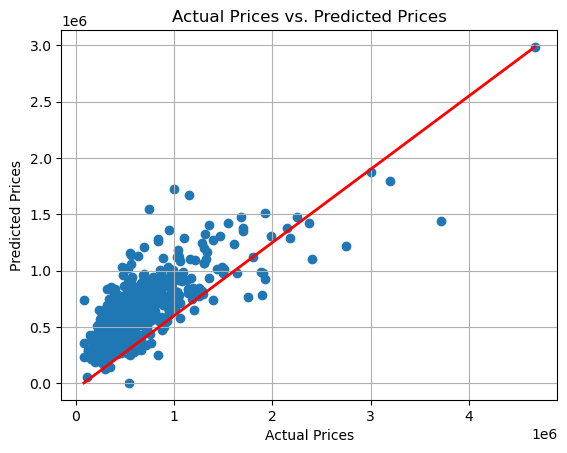

In [33]:
plt.scatter(y_test, y_pred, alpha=1)
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], color='red', linewidth=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs. Predicted Prices')
plt.grid(True)
plt.show()